    # regularized linear model to understand the significance of each feature and feature correlation
    # what has been done by Jia Xu:
        * data cleaning
        * individual feature exploration: influence of categorical variables on SalePrice (one way ANOVA)
        * pairwise feature exploration: correlation (heatmap)
        * feature transform
    # what to be done in this part:
        * focus on regularized linear model
        * feature dependence
        * feature coefficient
    # strategy:
        * Although in the feature.ipynb a heapmap has already been done, a more automatic and more systematic way is required to investigate correlation between features. 
        * Ridge model is my first try to know correlations
        

# import system libs

In [32]:
%matplotlib inline 
import pandas as pd
import numpy as np

# load cleaned data

In [2]:
X_train = pd.read_csv("X_train_update.csv")
y_train_log1p = pd.read_csv("y_train_log1p_update.csv")
X_test = pd.read_csv("X_test_update.csv")
ref_y_pred_log1p = pd.read_csv("y_pred_log1p_update.csv")

#y_train_log1p.drop("Unnamed*")
#X_train.head()
#y_train_log1p.head()
#X_test.head()
ref_y_pred_log1p.head()

,SalePrice
0,11.644302
1,12.001846
2,12.063531
3,12.194596
4,12.228959


# Ridge model

## * a rough result

In [3]:
from sklearn.linear_model import Ridge
#from sklearn.metrics import r2_score

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train_log1p) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### get linear correlation among features

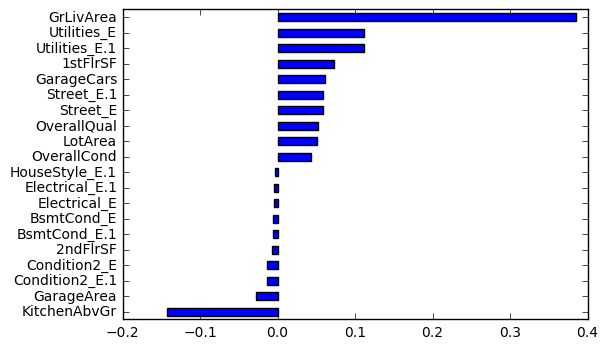

In [33]:
coef = pd.Series(model_ridge.coef_[0], index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")

### It is clear that many features are correlated